In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pylab
import numpy.polynomial.polynomial as poly
import numpy as np
import math
g=9.81

# Aufgabe 2 b

Im Vergleich zur vorherigen Aufgabe wird nun auch die Reibung berüksichtigt. Diese wirkt der Bewegung entgegen:

\begin{align}
\ddot{x}_0 = 0 - \dot{x}_r\\
\ddot{y}_0 = -g -\dot{y}_r
\end{align}

Setzt man die Gleitreibungskraft mit allgemeinen Kraft-/Beschleunigungformel gleich, so lassen sich die gesuchten Bewegungsgleichungen herleiten:

\begin{align}
F = m \cdot a \wedge F = \frac{1}{2}\cdot \pi R² \rho C v² \\
m \cdot a = \frac{1}{2}\cdot \pi R² \rho C v² \\
a = \frac{0.5 \cdot \pi R² \rho C}{m} v² \\
\end{align}

Die hergeleitete Formel betrachtet die Rechnung lediglich betraglich. Die gesuchte Lösung hingegen ist gerichtet. D.h. die Geschwindigkeit v muss vektoriell in die Rechnung einfließen.

\begin{align}
v² = \sqrt{\dot{x}² \cdot \dot{y²}} \cdot \vec{v} \\
\end{align}

Setzt man diese Erkenntnis in die Gleichung ein, so erhällt man:

\begin{align}
\ddot{x} = -\frac{0.5 \cdot \pi R² \rho C}{m} \sqrt{\dot{x}² \cdot \dot{y²}} \cdot \dot{x} \\
\ddot{x} = -g-\frac{0.5 \cdot \pi R² \rho C}{m} \sqrt{\dot{x}² \cdot \dot{y²}} \cdot \dot{y}
\end{align}

Beide Gleichungen sind Differenzialgleichungen 2. Ordnung. Diese lassen sich in Gleichungen 1. Ordung überführen:

\begin{align}
\dot{x} = \frac{z}{m} \cdot \sqrt{\dot{x}² \cdot \dot{y²}} \cdot \dot{x} \\
\frac{d}{dx}  
\left( \begin{array}{c}
x \\
\dot{x} 
\end{array} \right) = \left( \begin{array}{c}
\dot{x} \\
\frac{z}{m} \cdot \sqrt{\dot{x}² \cdot \dot{y²}} \cdot \dot{x}
\end{array} \right)
\end{align}

sowie:

\begin{align}
\dot{y} = -g \cdot \frac{z}{m} \cdot \sqrt{\dot{x}² \cdot \dot{y²}} \cdot \dot{y} \\
\frac{d}{dy}  
\left( \begin{array}{c}
y \\
\dot{y} 
\end{array} \right) = \left( \begin{array}{c}
\dot{y} \\
-\frac{z}{m} \cdot \sqrt{\dot{x}² \cdot \dot{y²}} \cdot \dot{y}
\end{array} \right)
\end{align}

mit:

\begin{align}
z=0.5 \cdot \pi R² \rho C
\end{align}

### Numerische Lösung

Zunächst wird wieder ein Zustandsvektor definiert. Diese ist vom Aufbau identisch zur Aufgabe a:

\begin{align}
\vec{u}= \left( \begin{array}{c}v_x\\v_y\\x\\y\end{array} \right)  
\vec{\dot{u}}= \left( \begin{array}{c}-\frac{0.5 \cdot \pi R² \rho C}{m} \sqrt{\dot{x}² \cdot \dot{y²}} \cdot \dot{x}\\-g-\frac{0.5 \cdot \pi R² \rho C}{m} \sqrt{\dot{x}² \cdot \dot{y²}} \cdot \dot{y}\\u(1)\\u(2)\end{array} \right)
\end{align}

Da das Koordinatensystem so gewählt wurde, dass der Moment des Abwurfes t=0 im Ursprung liegt, ergibt sich für den Startzustand (wie in a):


\begin{align}
\vec{u_0}= \left( \begin{array}{c}
v_0 \cdot \cos(\omega) \\
v_0 \cdot \sin(\omega) \\
0\\
0\end{array} \right) 
\end{align}

Die numerische Berechnung:

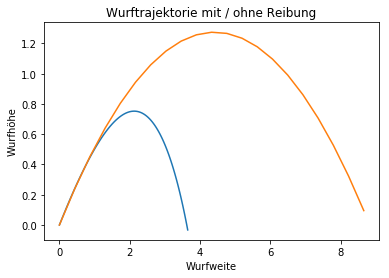

In [2]:
m=0.06 #60g Tennisball
R=0.033 #3,3cm Radius
C=0.5
rho=1.2041
z=0.5*3.1415926535*R*R*C*rho/m

v0 = 10
omega = 30
u1=[v0*math.cos(math.radians(omega))]
u2=[v0*math.sin(math.radians(omega))]
u3=[0]
u4=[0]

dt = 0.01
i=0;
while u4[-1]  >= 0 and i < 10000: #Rechnen bis der erste y-Wert unterhalb von 0 liegt => Boden berührt
    du1 = -z/m*   math.sqrt(u1[-1]*u1[-1]+u2[-1]*u2[-1])   * u1[-1]
    du2 = -g-(z/m*math.sqrt(u1[-1]*u1[-1]+u2[-1]*u2[-1]))  * u2[-1]
    du3 = u1[-1]
    du4 = u2[-1]
    u1.append(u1[-1] + du1 * dt)
    u2.append(u2[-1] + du2 * dt)
    u3.append(u3[-1] + du3 * dt)
    u4.append(u4[-1] + du4 * dt)
    i = i+1
plt.plot(u3, u4)

fx = lambda t, v0, omega : v0 * math.cos(math.radians(omega)) * t;      #Flugbahn x-Komponente
fy = lambda t, v0, omega: -0.5*g*t*t+v0*math.sin(math.radians(omega))*t #Flugbahn y-Komponente

plt.title('Wurftrajektorie mit / ohne Reibung')
plt.xlabel('Wurfweite')
plt.ylabel('Wurfhöhe')
plt.plot([fx(t, v0, omega) for t in np.arange(0, 1.03, 0.05)], [fy(t, v0, omega) for t in np.arange(0, 1.03, 0.05)])

Die blaue Kurve zeigt den Wurf mit Reibung. In orange wurde die Trajektorie ohne Reibung aus Aufgabeteil a dargestellt

Untersucht wird nun die Wurfweite. Aufgrund der Reibung lässt sich eine symbolische Lösung nur schwer erarbeiten. Die Lösung des Problems auf numerischem Weg ist jedoch relativ einfach. Der oben erstellte Code wird bereits liefert bereits die Wurfweite. Es ist die x-Koordinate des letzten errechneten Punktes.

Lässt man nun diese Koordinate für verschiedene Abwurfwinkel und Massen errechnen, so ist eine graphische Darstellung der Wurfweite in Abhängigkeit der Abwurfwinkel und Massen möglich:

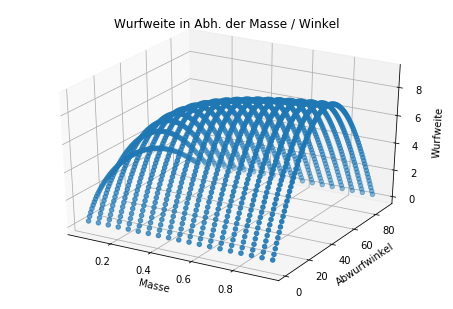

In [3]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random


m=0.06 #60g Tennisball
R=0.033 #3,3cm Radius
C=0.5
rho=1.2041
z=0.5*3.1415926535*R*R*C*rho/m

def ww(m, omega):
    v0 = 10
    u1=[v0*math.cos(math.radians(omega))]
    u2=[v0*math.sin(math.radians(omega))]
    u3=[0]
    u4=[0]

    dt = 0.001
    i=0;
    while u4[-1]  >= 0 and i < 10000: #Rechnen bis der erste y-Wert unterhalb von 0 liegt => Boden berührt
        du1 = -z/m*   math.sqrt(u1[-1]*u1[-1]+u2[-1]*u2[-1])   * u1[-1]
        du2 = -g-(z/m*math.sqrt(u1[-1]*u1[-1]+u2[-1]*u2[-1]))  * u2[-1]
        du3 = u1[-1]
        du4 = u2[-1]
        u1.append(u1[-1] + du1 * dt)
        u2.append(u2[-1] + du2 * dt)
        u3.append(u3[-1] + du3 * dt)
        u4.append(u4[-1] + du4 * dt)
        i = i+1
    return u3[-1]

fig = pyplot.figure()
ax = Axes3D(fig)


xe = []
ye = []
ze = []

for m_o in np.arange(0.05, 1, 0.05):
    for omega_o in np.arange(1, 90, 1):
        xe.append(m_o)
        ye.append(omega_o)
        ze.append(ww(m_o,omega_o))

plt.title('Wurfweite in Abh. der Masse / Winkel')
ax.set_xlabel('Masse')
ax.set_ylabel('Abwurfwinkel')
ax.set_zlabel('Wurfweite')
ax.scatter(xe, ye , ze)
pyplot.show()


Die oben stehende Grafik zeigt eine erste Zusammensetzung der Wurfweite aus Masse und Abwurfwinkel.
Nun wird die max. Wurfweite für verschiedene Massen dargestellt:

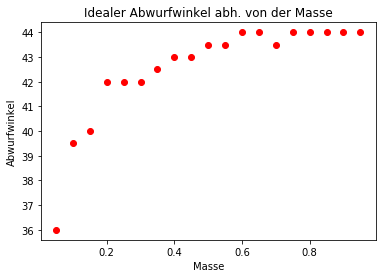

In [4]:

xe = []
ye = []

def omega_max_ww(m):
    omega_wwmax = -1;
    ww_max = 0;
    
    for omega_o in np.arange(1, 90, 0.5):
        current_ww = ww(m, omega_o)
        if ww_max < current_ww:
            ww_max = current_ww
            omega_wwmax = omega_o
    
    return omega_wwmax;
    

for m_o in np.arange(0.05, 1, 0.05):
        xe.append(m_o)
        ye.append(omega_max_ww(m_o))

plt.figure(2)
plt.title('Idealer Abwurfwinkel abh. von der Masse')
plt.xlabel('Masse')
plt.ylabel('Abwurfwinkel')
plt.plot(xe, ye, 'ro')


Im Vergleich zum Wurf ohne Reibung ist zu erkennen, dass der ideale Wurfwinkel (sodass die maximale Wurfweite erreicht wird) von der Masse abhängt.

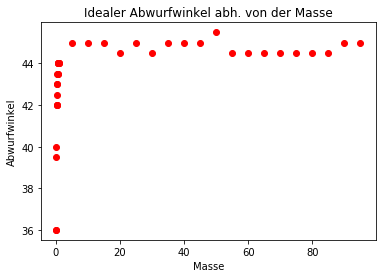

In [5]:
for m_o in np.arange(0.05, 100, 5):
        xe.append(m_o)
        ye.append(omega_max_ww(m_o))

plt.figure(2)
plt.title('Idealer Abwurfwinkel abh. von der Masse')
plt.xlabel('Masse')
plt.ylabel('Abwurfwinkel')
plt.plot(xe, ye, 'ro')

Erweitert man das Testintervall der Massen so zeigt sich eine Konvergenz des ideale Winkel gegen 45 Grad.